# Keras tutorial
This tutorial is a modification from https://elitedatascience.com/keras-tutorial-deep-learning-in-python

In [1]:
import numpy as np
from keras.models import Sequential # linear stack of neural network layers
from keras.layers import Dense, Dropout, Activation, Flatten # layers to use
from keras.layers import Convolution2D, MaxPooling2D # CNN layers
from keras.utils import np_utils
from keras.utils import to_categorical
%load_ext autotime

C:\Users\oscar\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Loading Data

Loading MURA images

In [2]:
import utils # importing from our utils functions

time: 4.27 s


In [18]:
x_train, y_train, x_test, y_test = utils.read_mura_pickle()

INFO:utils.utils:loading data/MURA-v1.1/x_train.pkl
INFO:utils.utils:loading data/MURA-v1.1/y_train.pkl
INFO:utils.utils:loading data/MURA-v1.1/x_valid.pkl
INFO:utils.utils:loading data/MURA-v1.1/y_valid.pkl


time: 2.73 s


We can look at the shape of the dataset:

In [23]:
x_train.shape

(36808, 256, 256)

Error in callback <function LineWatcher.stop at 0x000001DB551B9158> (for post_run_cell):


AssertionError: 

Visually inspect an image:

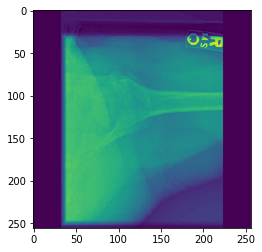

time: 119 ms


In [24]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])

## Data preparation

reshape the data from $512\times512$ to $512\times512\times1$ (1 for channel)

In [25]:
x_train = x_train.reshape(x_train.shape[0], 256, 256, 1)
x_test = x_test.reshape(x_test.shape[0], 256, 256, 1)

Error in callback <function LineWatcher.stop at 0x000001DB551B9158> (for post_run_cell):


AssertionError: 

In [26]:
x_train.shape

(36808, 256, 256, 1)

time: 15.5 ms


Convert our data type to float32 and normalize our data values to the range [0, 1].

In [27]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

time: 6.48 s


We have a 0-1 target so it's naturally one-hot coded, just need to reshape it to have one column

In [28]:
y_train = y_train.reshape(y_train.shape[0], 1)

Error in callback <function LineWatcher.stop at 0x000001DB551B9158> (for post_run_cell):


AssertionError: 

In [29]:
y_train.shape

(36808, 1)

Error in callback <function LineWatcher.stop at 0x000001DB551B9158> (for post_run_cell):


AssertionError: 

## Define model architecture

In [30]:
# declare sequential model
model = Sequential() 

time: 15.6 ms


In [31]:
# CNN input layer 
# the defaults for strides is (1,1) but it's always good to be explicit
model.add(Convolution2D(filters=32, kernel_size=(3, 3), strides=(1,1), activation='relu', input_shape=(512, 512, 1)))

time: 62.5 ms


We can check the shape of our model output after adding this layer

In [32]:
model.output_shape

(None, 510, 510, 32)

Error in callback <function LineWatcher.stop at 0x000001DB551B9158> (for post_run_cell):


AssertionError: 

And we can just keep adding layers like we are building legos

In [33]:
model.add(Convolution2D(filters=32, kernel_size=(3, 3), strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

time: 46.8 ms


MaxPooling2D is a way to reduce the number of parameters in our model by sliding a 2x2 pooling filter across the previous layer and taking the max of the 4 values in the 2x2 filter.

Dropout is used to prevent overfitting - read more about it [here](https://www.quora.com/How-does-the-dropout-method-work-in-deep-learning-And-why-is-it-claimed-to-be-an-effective-trick-to-improve-your-network)

In [34]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

time: 78.1 ms


## Compile model

We still need to define the loss and optimization method. Keras has a variety of [loss functions](https://keras.io/losses/) and out-of-the-box [optimizers](https://keras.io/optimizers/) to choose from. For this tutorial we'll use cross-entropy as loss function and [Adam](https://arxiv.org/abs/1412.6980) as our optimizer.

In [35]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

time: 46.7 ms


## Fitting the model

In [36]:
model.fit(x_train, y_train, 
          batch_size=8, nb_epoch=10, verbose=1)

C:\Users\oscar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


ValueError: Error when checking input: expected conv2d_1_input to have shape (512, 512, 1) but got array with shape (256, 256, 1)

time: 46.9 ms


We can check how loss and accuracy change over epochs

AttributeError: 'Sequential' object has no attribute 'history'

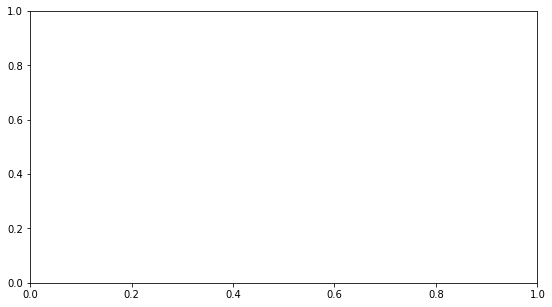

time: 114 ms


In [38]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(model.history.history['loss'])
plt.title('Loss')
plt.subplot(122)
plt.plot(model.history.history['acc'])
plt.title('Accuracy')
plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.show()

## Evaluating our model on the test set

### Loss and Accuracy

In [39]:
score = model.evaluate(x_test, y_test, verbose=0)

ValueError: Error when checking input: expected conv2d_1_input to have shape (512, 512, 1) but got array with shape (256, 256, 1)

time: 15.6 ms


In [40]:
score

NameError: name 'score' is not defined

time: 15.6 ms


In [41]:
# compute predicted y
y_test_hat = model.predict(x_test)

ValueError: Error when checking input: expected conv2d_1_input to have shape (512, 512, 1) but got array with shape (256, 256, 1)

time: 15.6 ms


In [42]:
# get actual digit labels
true_label = np.argmax(y_test, axis=1)
pred_label = np.argmax(y_test_hat, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

time: 15.5 ms


### Cohen's Kappa

In [43]:
p_observed = (true_label == pred_label).sum()/true_label.shape[0]
p_expected = sum([(true_label == i).sum() * (pred_label == i).sum() / (true_label.shape[0] ** 2) for i in range(10)])

NameError: name 'true_label' is not defined

time: 15.6 ms


In [44]:
kappa = (p_observed - p_expected) / (1 - p_expected)

NameError: name 'p_observed' is not defined

time: 15.5 ms


In [45]:
kappa

NameError: name 'kappa' is not defined

time: 9.19 ms
